# Vegetable Farms


***Author***: Fabian Georgi (s0563263) <br>
***Date***: 2018-11-18 <br>

## Importieren der Libraries/Frameworks

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Festlegen der Dateipfade

In [4]:
# File pathes for quick adjustment if places or directories change.
path_input = '00_data_input'
path_temp = '01_data_temp'
path_inter = '02_data_intermediate'
path_output = '03_data_output'
path_atlas = os.path.join(path_input, 'food_atlas.xls')
path_farms = os.path.join(path_inter, 'farms_refined_data.csv')

## Extraktion der relevanten Daten

>**Initial Dataframe**  
>We use data provided by:
>**United States Department of Agriculture**  
>https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/#Current%20Version  
>This data is provided as an Excel file with multiple sheets.
>The values of the food atlas are collected for each US county which are identified by their FIPS-code.

In [5]:
# Load the health table from the food atlas data and extract the columns dealing with obesity.
df_local = pd.read_excel(path_atlas, sheet_name='LOCAL')
df_farms = df_local[['FIPS', 'VEG_FARMS07', 'VEG_FARMS12', 'VEG_ACRES07', 'VEG_ACRES12']].copy()

# Show some information about the dataframe we extracted so far.
print('{:<25} {:d}'.format('Number of entries:', len(df_farms.index)))
df_farms[:5]

Number of entries:        3143


,FIPS,VEG_FARMS07,VEG_FARMS12,VEG_ACRES07,VEG_ACRES12
0,1001,34.0,45.0,948.0,1230.0
1,1003,51.0,50.0,2280.0,1958.0
2,1005,11.0,7.0,32.0,41.0
3,1007,10.0,11.0,65.0,14.0
4,1009,67.0,64.0,585.0,677.0


In [6]:
# Rename the columns to allow for better reading and referencing in the future.
df_farms.rename(columns={'FIPS': 'county_fips', 'VEG_FARMS07':'ABS_veg_farms_2007','VEG_FARMS12':'ABS_veg_farms_2012','VEG_ACRES07':'ABS_veg_acres_2007', 'VEG_ACRES12':'ABS_veg_acres_2012'}, inplace=True)

# Add some colums of values (average, change) derived directly from the ones that where in the atlas.
df_farms['ABS_veg_farms_average'] = round((df_farms['ABS_veg_farms_2007'] + df_farms['ABS_veg_farms_2012'])/2, 3)
df_farms['ABS_veg_farms_change'] = round(df_farms['ABS_veg_farms_2012'] - df_farms['ABS_veg_farms_2007'],3)
df_farms['ABS_veg_acres_average'] = round((df_farms['ABS_veg_acres_2007'] + df_farms['ABS_veg_acres_2012'])/2, 3)
df_farms['ABS_veg_acres_change'] = round(df_farms['ABS_veg_acres_2012'] - df_farms['ABS_veg_acres_2007'], 3)

# Rearranging the columns
df_farms = df_farms.reindex_axis(['county_fips','ABS_veg_farms_2007','ABS_veg_farms_2012','ABS_veg_farms_average','ABS_veg_farms_change','ABS_veg_acres_2007','ABS_veg_acres_2012','ABS_veg_acres_average','ABS_veg_acres_change'], axis=1)

df_farms[:5]

,county_fips,ABS_veg_farms_2007,ABS_veg_farms_2012,ABS_veg_farms_average,ABS_veg_farms_change,ABS_veg_acres_2007,ABS_veg_acres_2012,ABS_veg_acres_average,ABS_veg_acres_change
0,1001,34.0,45.0,39.5,11.0,948.0,1230.0,1089.0,282.0
1,1003,51.0,50.0,50.5,-1.0,2280.0,1958.0,2119.0,-322.0
2,1005,11.0,7.0,9.0,-4.0,32.0,41.0,36.5,9.0
3,1007,10.0,11.0,10.5,1.0,65.0,14.0,39.5,-51.0
4,1009,67.0,64.0,65.5,-3.0,585.0,677.0,631.0,92.0


**Saving the data for later use**

In [7]:
df_farms.to_csv(path_farms)

## Plotten der Daten

In [8]:
def plot_distribution(title, series, bins, color):
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    sns.distplot(series.dropna(), bins=bins, color=color, kde=False)

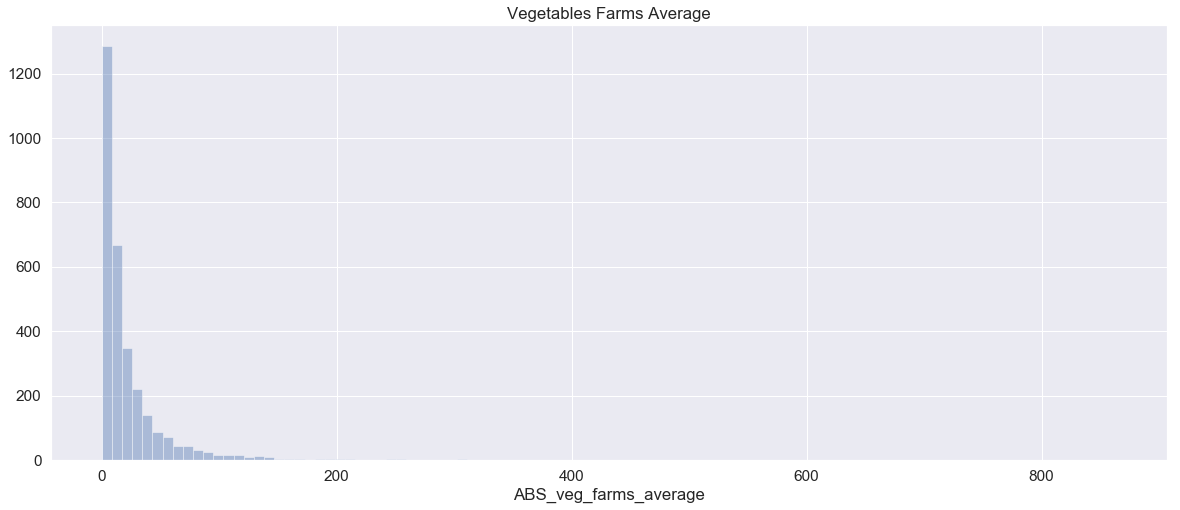

In [9]:
plot_distribution('Vegetables Farms Average', df_farms['ABS_veg_farms_average'], 100, 'b')

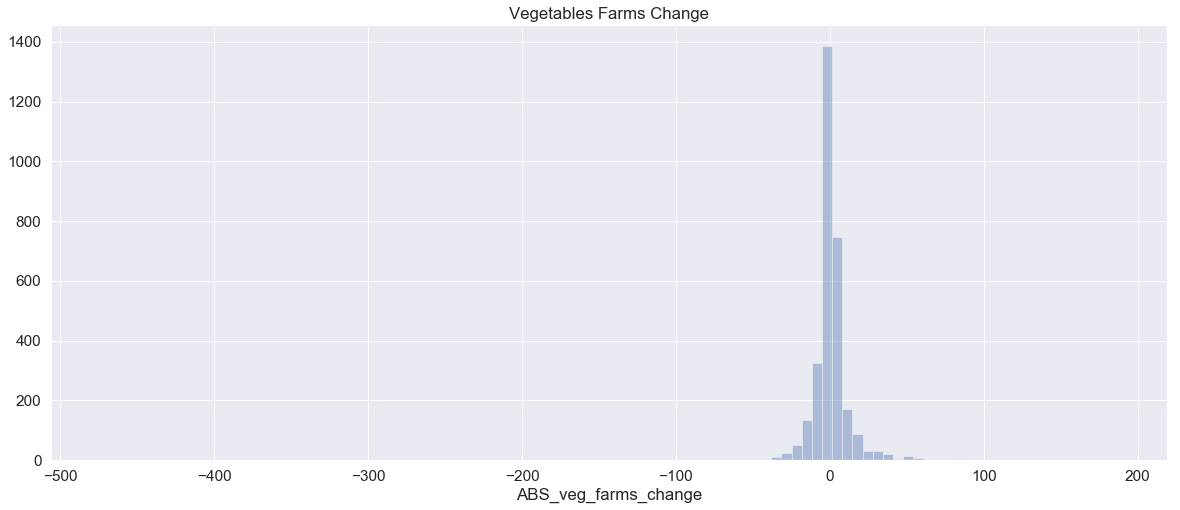

In [10]:
plot_distribution('Vegetables Farms Change', df_farms['ABS_veg_farms_change'], 100, 'b')

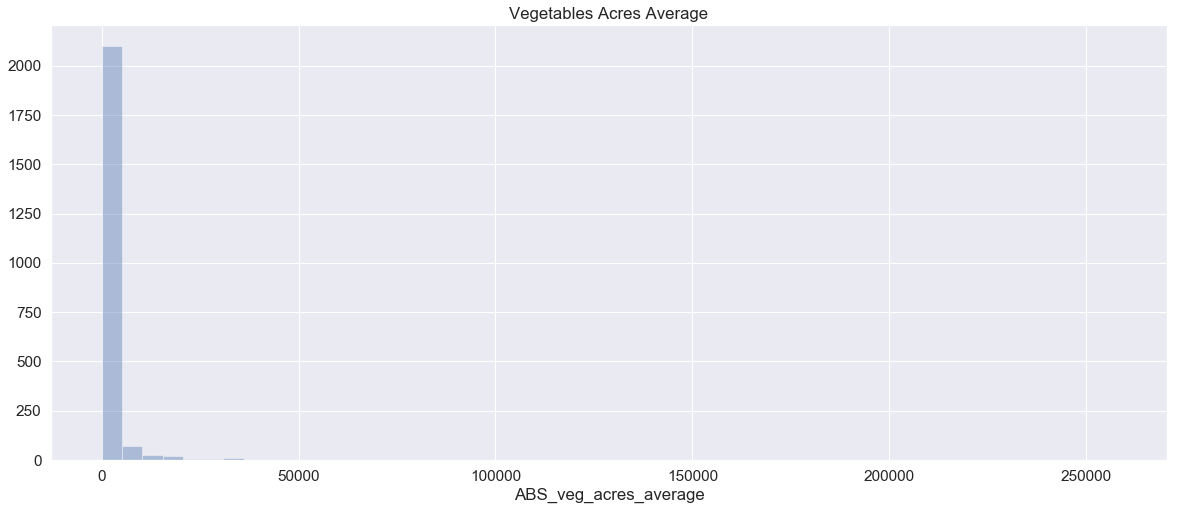

In [11]:
plot_distribution('Vegetables Acres Average', df_farms['ABS_veg_acres_average'], 50, 'b')

# Obesity und Farms

**Importieren/Laden der anderen Dateien**

In [12]:
path_obesity = os.path.join(path_inter, 'obesity_refined_data.csv')
df_obesity = pd.read_csv(path_obesity)

**Mergen der beiden Datensätze**

In [13]:
df_obese_farms = df_obesity[['county_fips','PCT_obese_adults_2013']]
df_obese_farms = df_obese_farms.merge(df_farms[['county_fips','ABS_veg_acres_average']], how='inner', on='county_fips')
df_obese_farms[:4]

,county_fips,PCT_obese_adults_2013,ABS_veg_acres_average
0,1001,34.1,1089.0
1,1003,27.4,2119.0
2,1005,44.4,36.5
3,1007,40.3,39.5


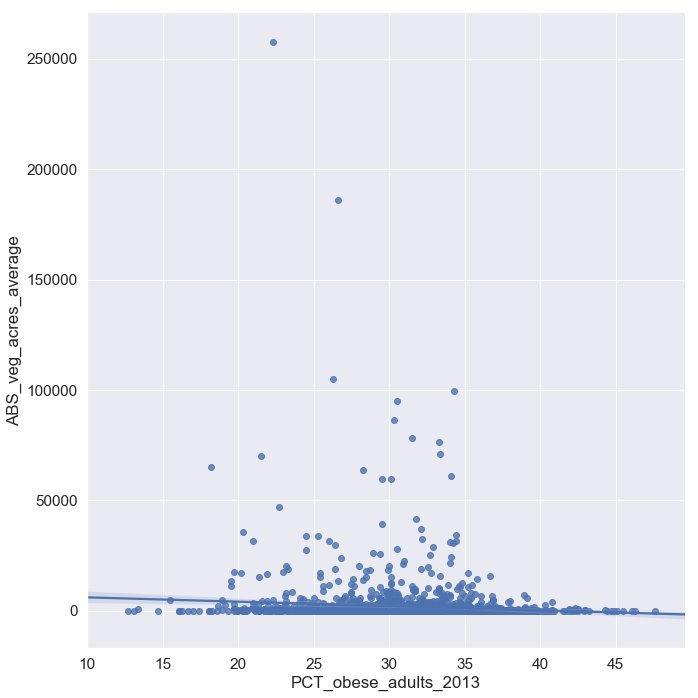

In [14]:
sns.lmplot(x='PCT_obese_adults_2013', y='ABS_veg_acres_average', data=df_obese_farms, size=10)

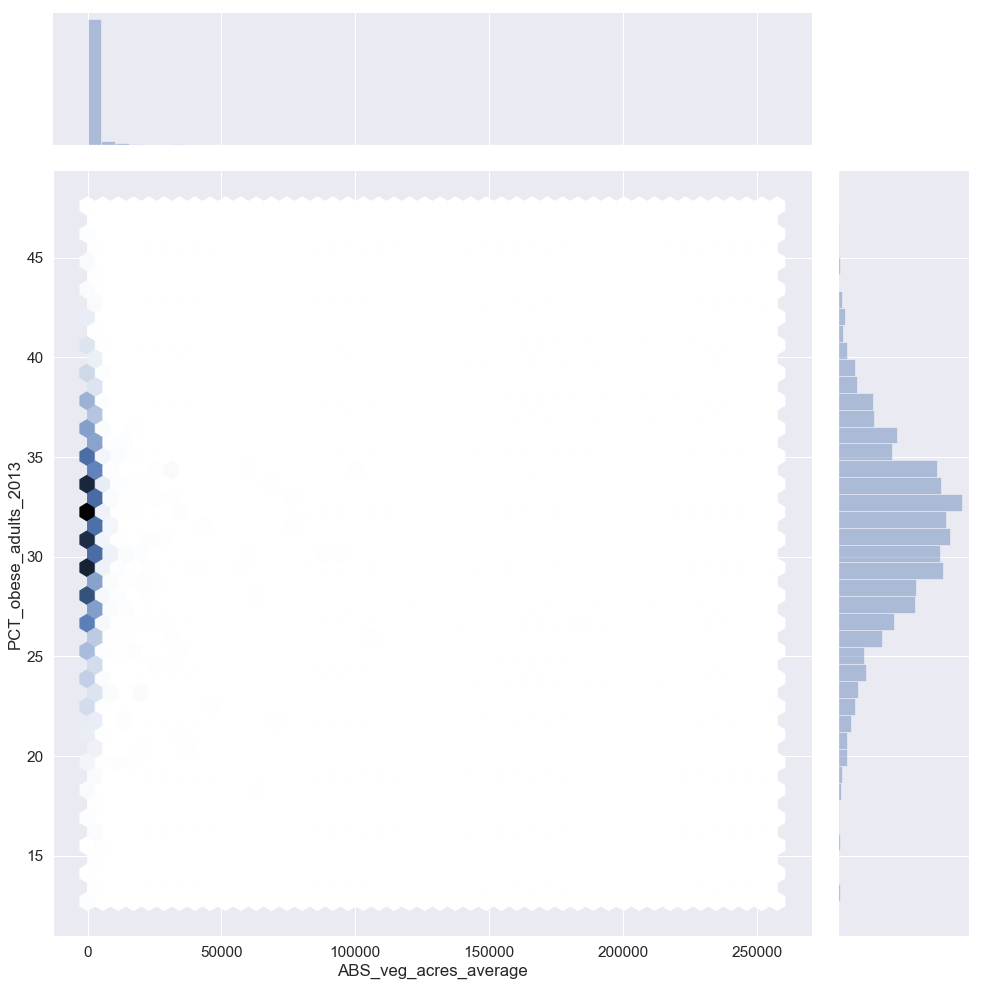

In [15]:
sns.jointplot(x='ABS_veg_acres_average', y='PCT_obese_adults_2013', data=df_obese_farms, kind='hex', size=14)